## Steelmint 
#### Aim: To find the corelation between the movement of substitute goods to the actual prices of the pellet  
#### Given: NMDC_movement, Odisha_movement, NMDC_prices, Odisha_prices, Pellet_prices over a period of one year

In [331]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [332]:
# Data is fetched in pd.data_frame and then normalized 
file_name = "../data/compiled_data_6july2019.csv"
data = pd.read_csv(filename)
data = np.array(data)
print("Actual Data: ")
print(data)
# Only taking columns NMDC_movement, Odisha_movement, NMDC_prices, Pellet_prices
data = data[:, [1, 2, 3, 5]]
scaler = MinMaxScaler()
scaler.fit(data)
data = scaler.transform(data)
columns = ['NMDC_movement', 'Odisha_movement', 'NMDC_prices', 'Pellet_prices']
print("Normalised Data: ")
print(data)

Actual Data: 
[["April'18" 146300 216400 3425 nan 6200.0]
 ["May'18" 134750 207412 3540 nan 5945.8325]
 ["June'18" 142450 212854 3540 nan 6136.665]
 ["July'18" 69300 218357 3720 nan 6450.0]
 ["Aug'18" 53900 320548 3890 nan 7106.25]
 ["Sep'18" 150150 368560 4500 5850.0 9250.0]
 ["Oct'18" 180950 372680 4620 5730.0 8408.3325]
 ["Nov'18" 73150 360747 4620 5358.0 7575.0]
 ["Dec'18" 92400 376443 3835 4515.0 6430.834]
 ["Jan'19" 92400 358762 3370 3888.0 6037.5]
 ["Feb'19" 227150 445797 3480 4438.0 7018.125]
 ["Mar'19" 150150 449647 3480 4350.0 6660.0]
 ["Apr'19" 123586 470013 3310 3960.0 6268.75]
 ["May'19" 188650 466811 3310 4075.0 6560.4175]]
Normalised Data: 
[[0.53333333 0.03422683 0.08778626 0.07692331]
 [0.46666667 0.         0.17557252 0.        ]
 [0.51111111 0.02072345 0.17557252 0.05775509]
 [0.08888889 0.0416792  0.3129771  0.15258533]
 [0.         0.43082852 0.44274809 0.35119815]
 [0.55555556 0.61366103 0.90839695 1.        ]
 [0.73333333 0.62935023 1.         0.74527093]
 [0.111

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


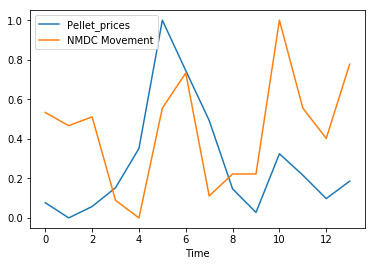

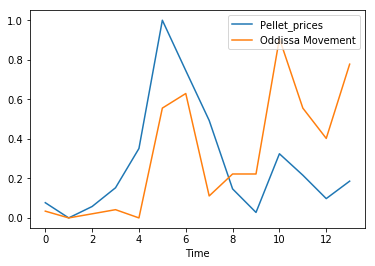

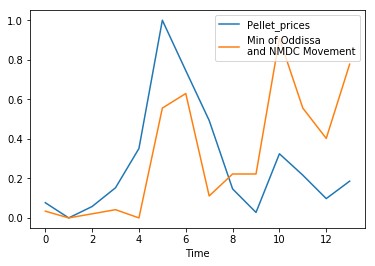

In [339]:
# Plotting Minimum of Oddissa and NMDC Movement and Pellet_prices at a given point of time
plt.plot(data[:, 3])
plt.plot(data[:, 0])
plt.legend([columns[3], "NMDC Movement"])
plt.xlabel("Time")
plt.show()

# Plotting Minimum of Oddissa and NMDC Movement and Pellet_prices at a given point of time
plt.plot(data[:, 3])
plt.plot(np.minimum(data[:, 0], data[:, 1]))
plt.legend([columns[3], "Oddissa Movement"])
plt.xlabel("Time")
plt.show()


# Plotting Minimum of Oddissa and NMDC Movement and Pellet_prices at a given point of time
plt.plot(data[:, 3])
plt.plot(np.minimum(data[:, 0], data[:, 1]))
plt.legend([columns[3], "Min of Oddissa \nand NMDC Movement"])
plt.xlabel("Time")
plt.show()

###### Inferences: 
    * There is a relation between the Movement of substitute goods and the Pellet Prices
    * Prices tends to be better modelled with the min of both the substititute movements
    * The trends in movement is slower than in the Pellet prices which means we see a change first in prices which repell to the movement

###### Probable Reason:
    * With change in prices of the actual good the market tends to shift to substitutes
    * Ideal customer will always choose the substitute that maximezes the profit
    * Pellet being the main good is prefered first or some other market dynamics

###### Test 01: To fit different models and verify the accuracy of all of the above inferences

0.6482958120009181


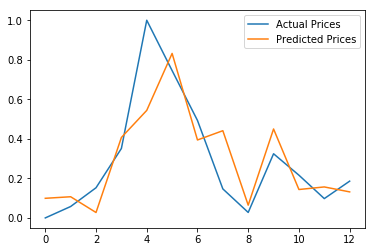

In [334]:
# TEST 01

X = []
y = []
prev_row = []
for row in data:
    if len(prev_row) != 0:
        _row = []
        _row.append(prev_row[0])
        _row.append(prev_row[1])
        _row.append(prev_row[3])
        _row.append(row[0])
        _row.append(row[1])
        X.append(_row)
        y.append(row[3])
    prev_row = row


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression(n_jobs=-1)

model.fit(X, y)
print(model.score(X, y))
pred_y = model.predict(X)
plt.plot(y)
plt.plot(pred_y)
plt.legend(["Actual Prices", "Predicted Prices"])
plt.show()

#### Result Test 01: 
    * The above graph clearly proves that the Pellet Prices are highly corelated with the NMDC and Odissa Prices, hence our inference was correct 

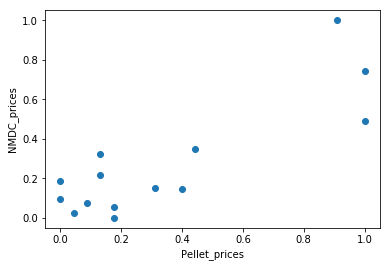

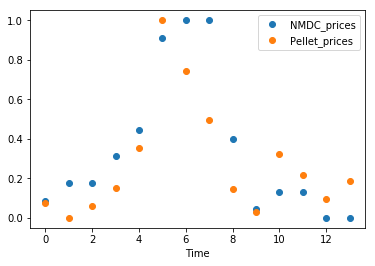

In [335]:
# Plotting NMDC_prices vs Pellet_prices
plt.plot(data[:, 2], data[:, 3],'o')
plt.xlabel(columns[3])
plt.ylabel(columns[2])
plt.show()
# Plotting NMDC_prices and Pellet_prices at a given point of time
plt.plot(data[:, 2:4],'o')
plt.xlabel("Time")
plt.legend(columns[2:4])
plt.show()

#### Inference: I see a linear corelation between the NMDC_prices and Pellet_prices
###### Probable Reason: NMDC is the substitute good for Pellet and Increase in NMDC_Prices should lead to increase in Pellet_Prices 
###### Test 02: Given the NMDC Prices find out the corelation with the Pellet Prices

0.8123636208083858


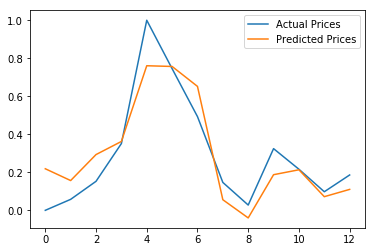

In [336]:
# TEST 02

X = []
y = []
prev_row = []
for row in data:
    if len(prev_row) != 0:
        _row = []
        _row.append(prev_row[2])
        _row.append(prev_row[3])
        _row.append(row[2])
        X.append(_row)
        y.append(row[3])
    prev_row = row


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression(n_jobs=-1)

model.fit(X, y)
print(model.score(X, y))
pred_y = model.predict(X)
plt.plot(y)
plt.plot(pred_y)
plt.legend(["Actual Prices", "Predicted Prices"])
plt.show()

#### Result Test 02: 
    * The above graph clearly proves that the Pellet Prices are highly corelated with the NMDC_prices, hence our inference was correct 

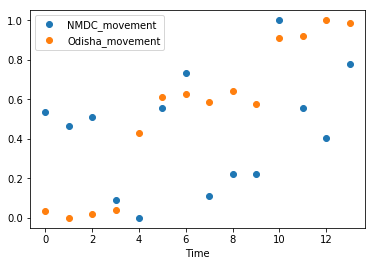

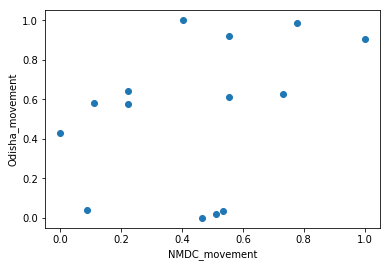

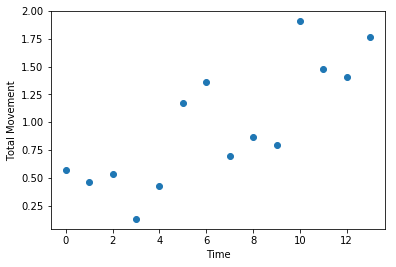

In [337]:
#Plotting general trends of movement for NMDC and Odissa with respect to Time
plt.plot(data[:, 0:2], 'o')
plt.xlabel("Time")
plt.legend(columns[0:2])
plt.show()

# Plotting NMDC_movement vs Odissa_movement
plt.plot(data[:, 0], data[:, 1], 'o')
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

#Plotting Total movement of susbstitiute goods wrt
plt.plot(np.add(data[:, 0], data[:, 1]), 'o')
plt.xlabel("Time")
plt.ylabel("Total Movement")
plt.show()


#### Inference: 
    * NMDC_Movement appears to be a mirror image of the Odissa_movement
    * Total Movement is increasing
###### Probable Reason: 
    * NMDC is the substitute good for Odissa and the Market size is constant, increase in supply of the one should decrease in the supply of other
    * Total Market size of the steel is Increasing hence the total movement is increase. There might be improvement in Logistics
###### Test 03: Given the NMDC Movement find out the corelation with Odissa Movement

0.8954203770381994


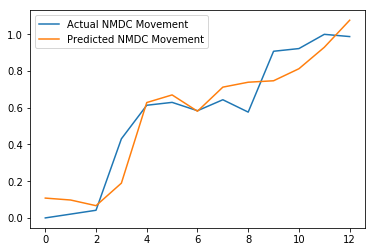

In [338]:
# TEST 03

X = []
y = []
prev_row = []
for row in data:
    if len(prev_row) != 0:
        _row = []
        _row.append(prev_row[0])
        _row.append(prev_row[1])
        _row.append(row[0])
        X.append(_row)
        y.append(row[1])
    prev_row = row


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression(n_jobs=-1)

model.fit(X, y)
print(model.score(X, y))
pred_y = model.predict(X)
plt.plot(y)
plt.plot(pred_y)
plt.legend(["Actual NMDC Movement", "Predicted NMDC Movement"])
plt.show()

#### Result Test 02: 
    * The above graph clearly proves that both of the Movements are highly corelated